# $\mathrm{La_4Ni_3O_{10}}$ soft x-ray spectroscopy measurements

- Data collected in the SEXTANTS beamline of the SOLEIL synchrotron.
- Sample at room temperature.
- RIXS energy resolution ~ 400 meV.
- Horizontal scattering geometry with $\theta_i$ = 15 degrees and $2\theta$ = 95 degrees.

<img src="geometry.png" width=300 height=394 />

###  Load packages and data

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from glob import glob
import numpy as np

In [2]:
sig = {}
pi = {}
for pol, label in zip([sig, pi], ["sigma", "pi"]):
    files = glob(f"data/La4Ni3O10*{label}*eV.dat")
    files.sort(key = lambda x: float(
            x.split(f"{label}_")[-1].split("eV")[0].replace("p", ".")
        )
    )
    pol["map"] = dict(ein = [], eloss = [], rixs = [])
    for fname in files:
        energy = float(
            fname.split(f"{label}_")[-1].split("eV")[0].replace("p", ".")
        )
        pol[energy] = np.loadtxt(fname)
        if energy < 865:
            pol["map"]["ein"].append(energy)
            if len(pol["map"]["eloss"]) == 0:
                pol["map"]["eloss"] = pol[energy][:, 0]
            pol["map"]["rixs"].append(pol[energy][:, 1])


In [3]:
nilh = np.loadtxt("data/La4Ni3O10_pi_NiLedgeXAS.dat")
nilv = np.loadtxt("data/La4Ni3O10_sigma_NiLedgeXAS.dat")
olh = np.loadtxt("data/La4Ni3O10_pi_OKedgeXAS.dat")
olv = np.loadtxt("data/La4Ni3O10_sigma_OKedgeXAS.dat")

## Ni $L_{2,3}$ and O K XAS

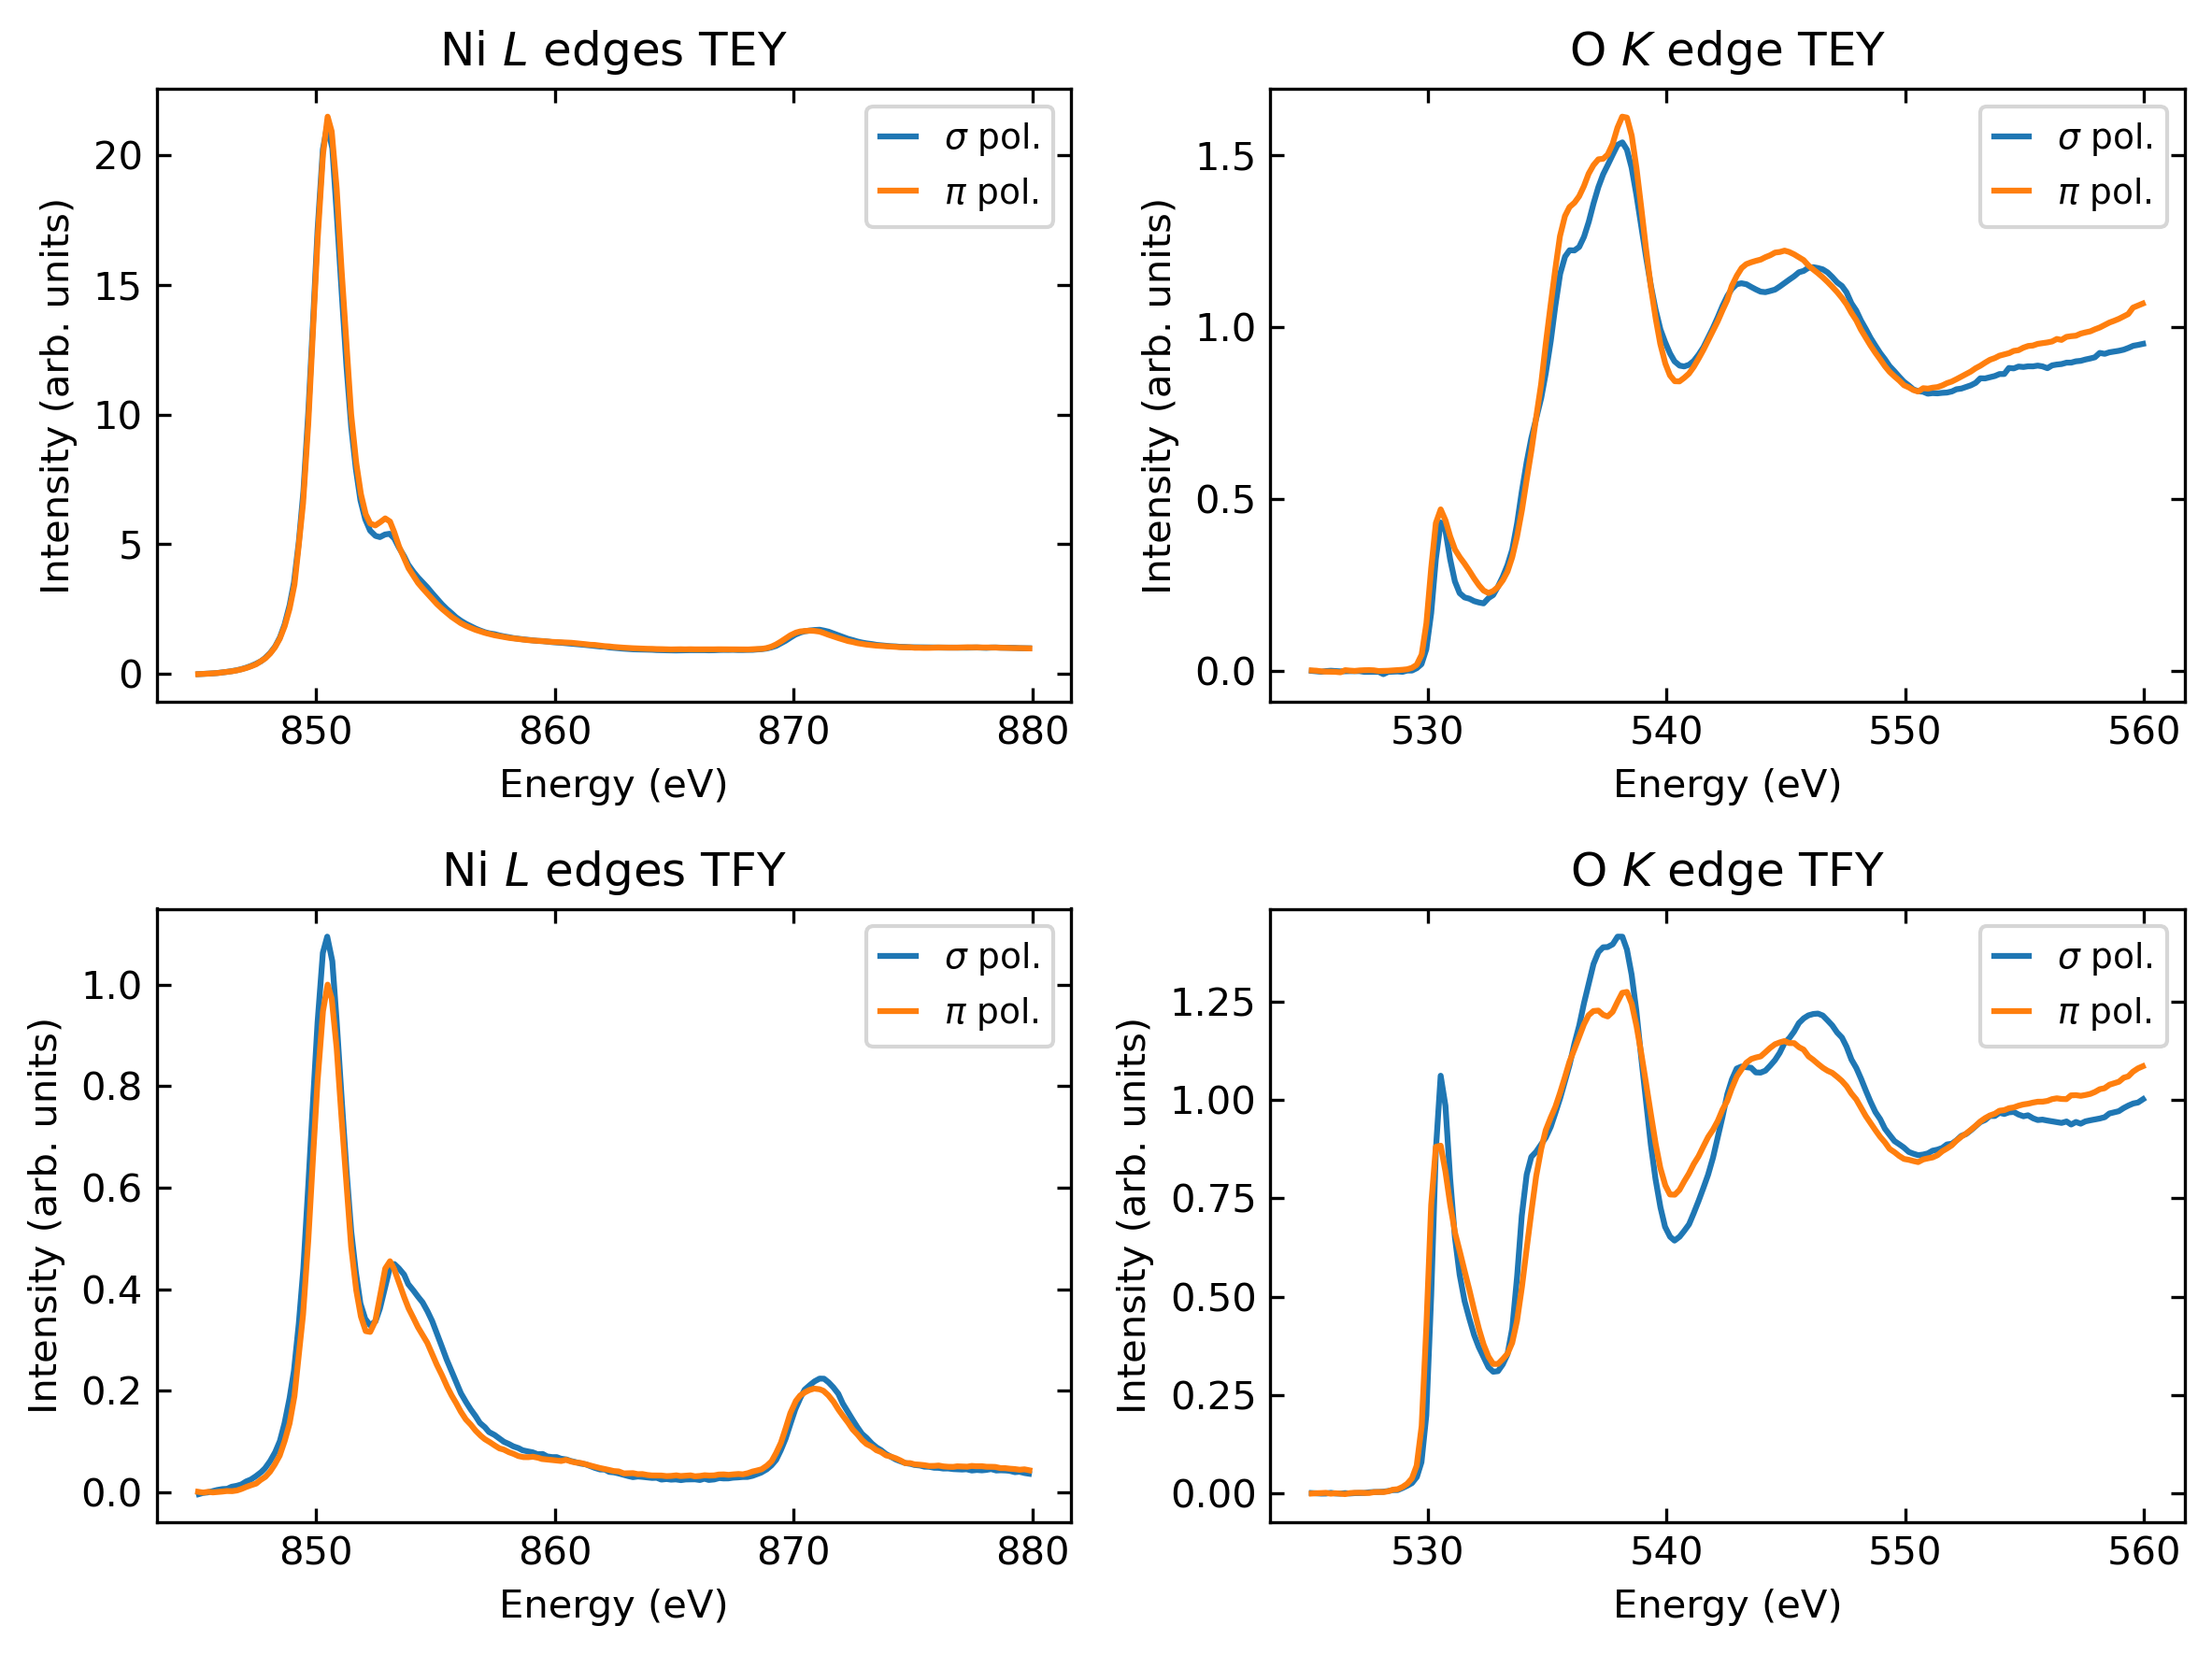

In [4]:
fig, axs = plt.subplots(2, 2, figsize=(8, 6), dpi=300)

plt.sca(axs.flatten()[0])
norm = nilv[nilv[:, 0] > 875.5, 1].mean()
plt.plot(nilv[:, 0], nilv[:, 1]/norm, label=r"$\sigma$ pol.")
norm = nilh[nilh[:, 0] > 875.5, 1].mean()
plt.plot(nilh[:, 0], nilh[:, 1]/norm, label=r"$\pi$ pol.")
plt.title(r"Ni $L$ edges TEY")

plt.sca(axs.flatten()[1])
plt.plot(olv[:, 0], olv[:, 1], label=r"$\sigma$ pol.")
plt.plot(olh[:, 0], olh[:, 1], label=r"$\pi$ pol.")
plt.title(r"O $K$ edge TEY")

plt.sca(axs.flatten()[2])
norm = nilv[nilv[:, 0] > 875.5, 2].mean()
plt.plot(nilv[:, 0], nilv[:, 2], label=r"$\sigma$ pol.")
norm = nilh[nilh[:, 0] > 875.5, 2].mean()
plt.plot(nilh[:, 0], nilh[:, 2], label=r"$\pi$ pol.")
plt.title(r"Ni $L$ edges TFY")

plt.sca(axs.flatten()[3])
plt.plot(olv[:, 0], olv[:, 2], label=r"$\sigma$ pol.")
plt.plot(olh[:, 0], olh[:, 2], label=r"$\pi$ pol.")
plt.title(r"O $K$ edge TFY")

for ax in axs.flatten():
    plt.sca(ax)
    plt.tick_params(direction="in", top=True, right=True)
    plt.ylabel("Intensity (arb. units)")
    plt.xlabel("Energy (eV)")
    plt.legend(fontsize=9, handlelength=1)

plt.tight_layout()

## Ni $L_3$ RIXS map

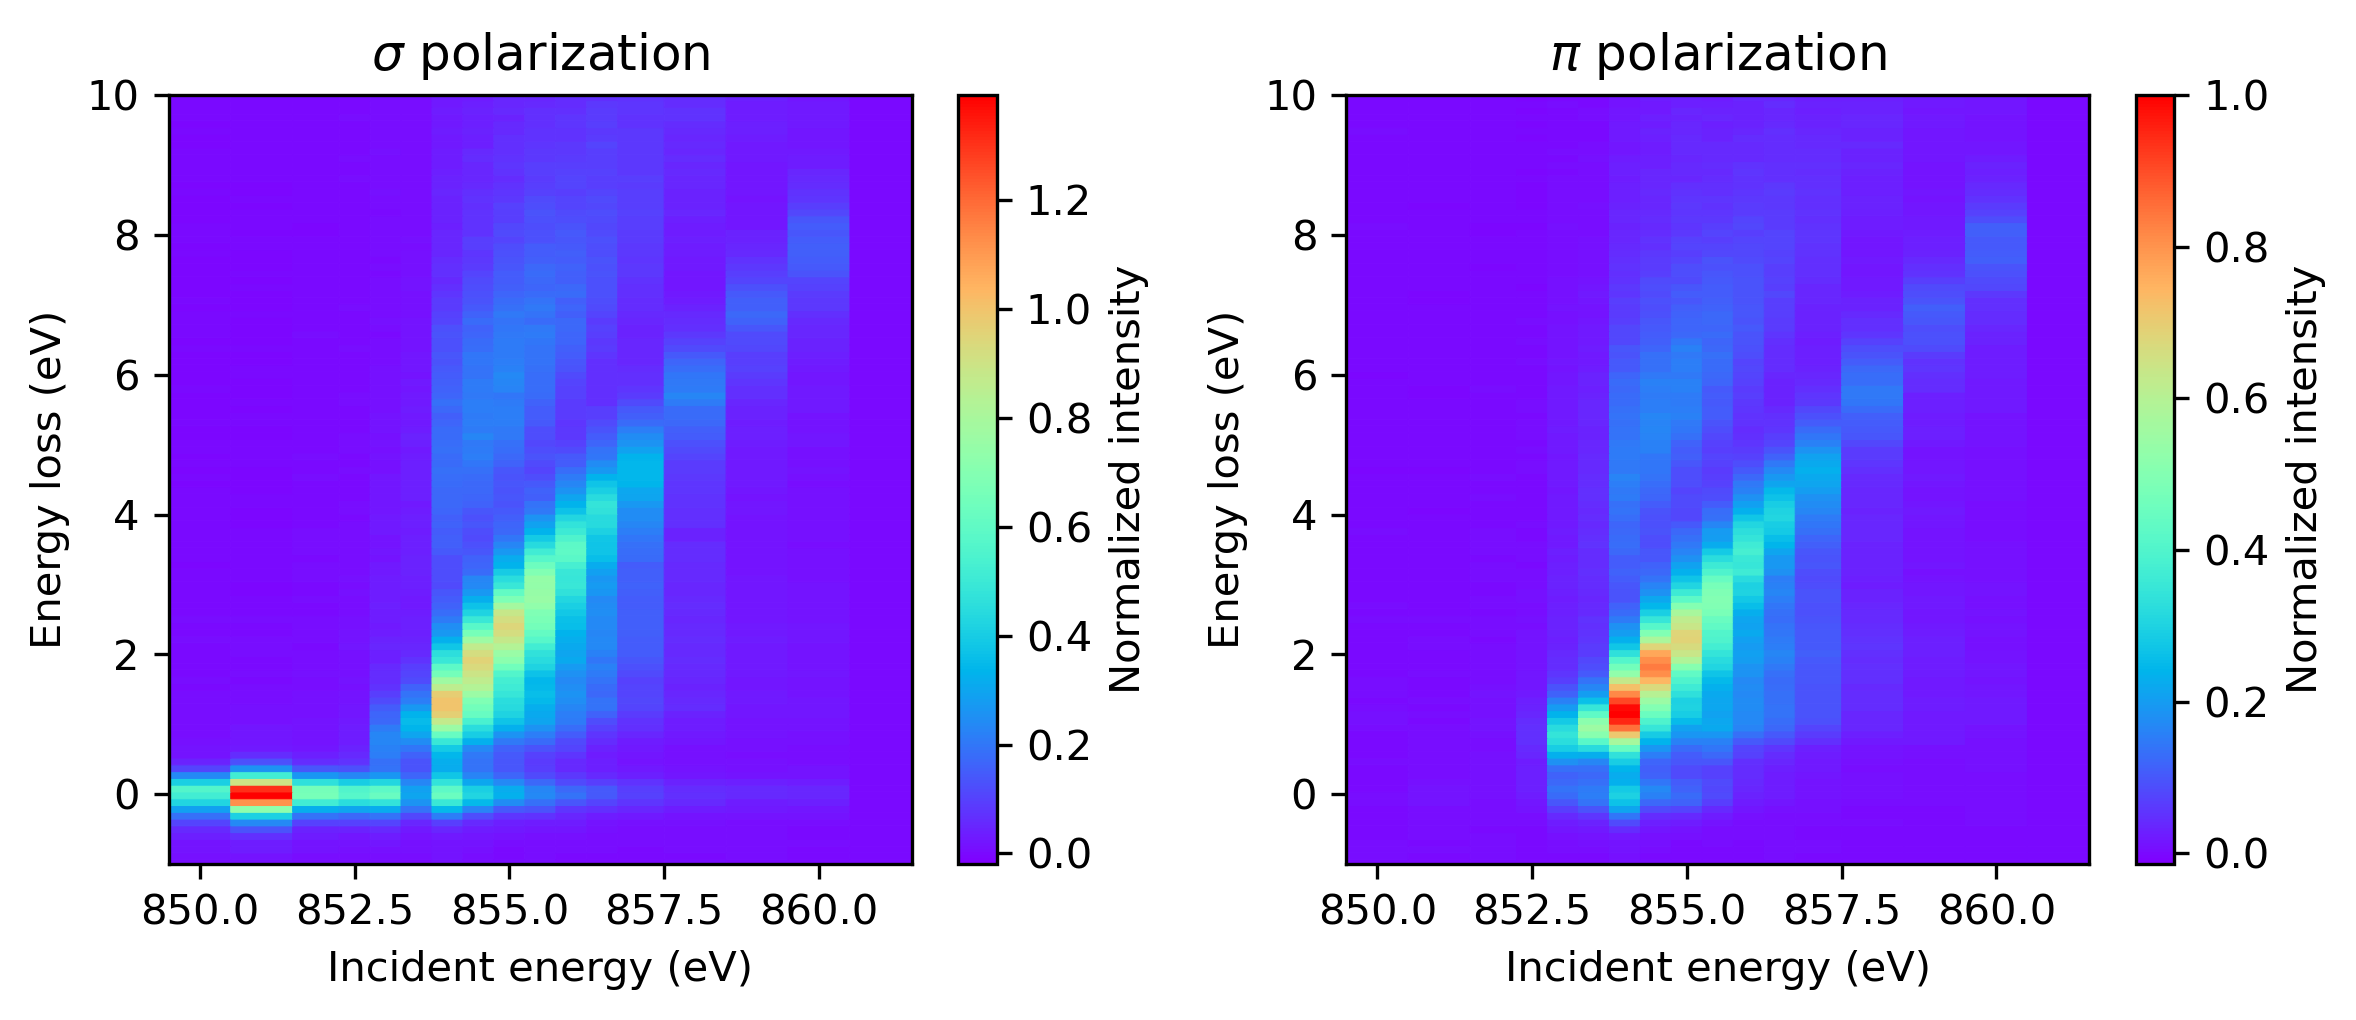

In [5]:
fig, axs = plt.subplots(1, 2, figsize=(8, 3.5), dpi=300)

for pol, ax in zip([sig["map"], pi["map"]], axs):
    plt.sca(ax)
    x, y = np.meshgrid(pol["ein"], pol["eloss"])
    z = np.array(pol["rixs"]).transpose()

    vmin = np.percentile(z, 1)
    vmax = np.percentile(z[y > 0.5], 100)
    plt.pcolor(x, y, z, cmap='rainbow', edgecolors='face')
    plt.ylim(-1,10)
    cax = plt.colorbar(label="Normalized intensity")
    plt.xlabel("Incident energy (eV)")
    plt.ylabel("Energy loss (eV)")

axs[1].set_title(r"$\pi$ polarization")
axs[0].set_title(r"$\sigma$ polarization")
plt.tight_layout()

## Ni $L_{3, 2}$ RIXS linecuts

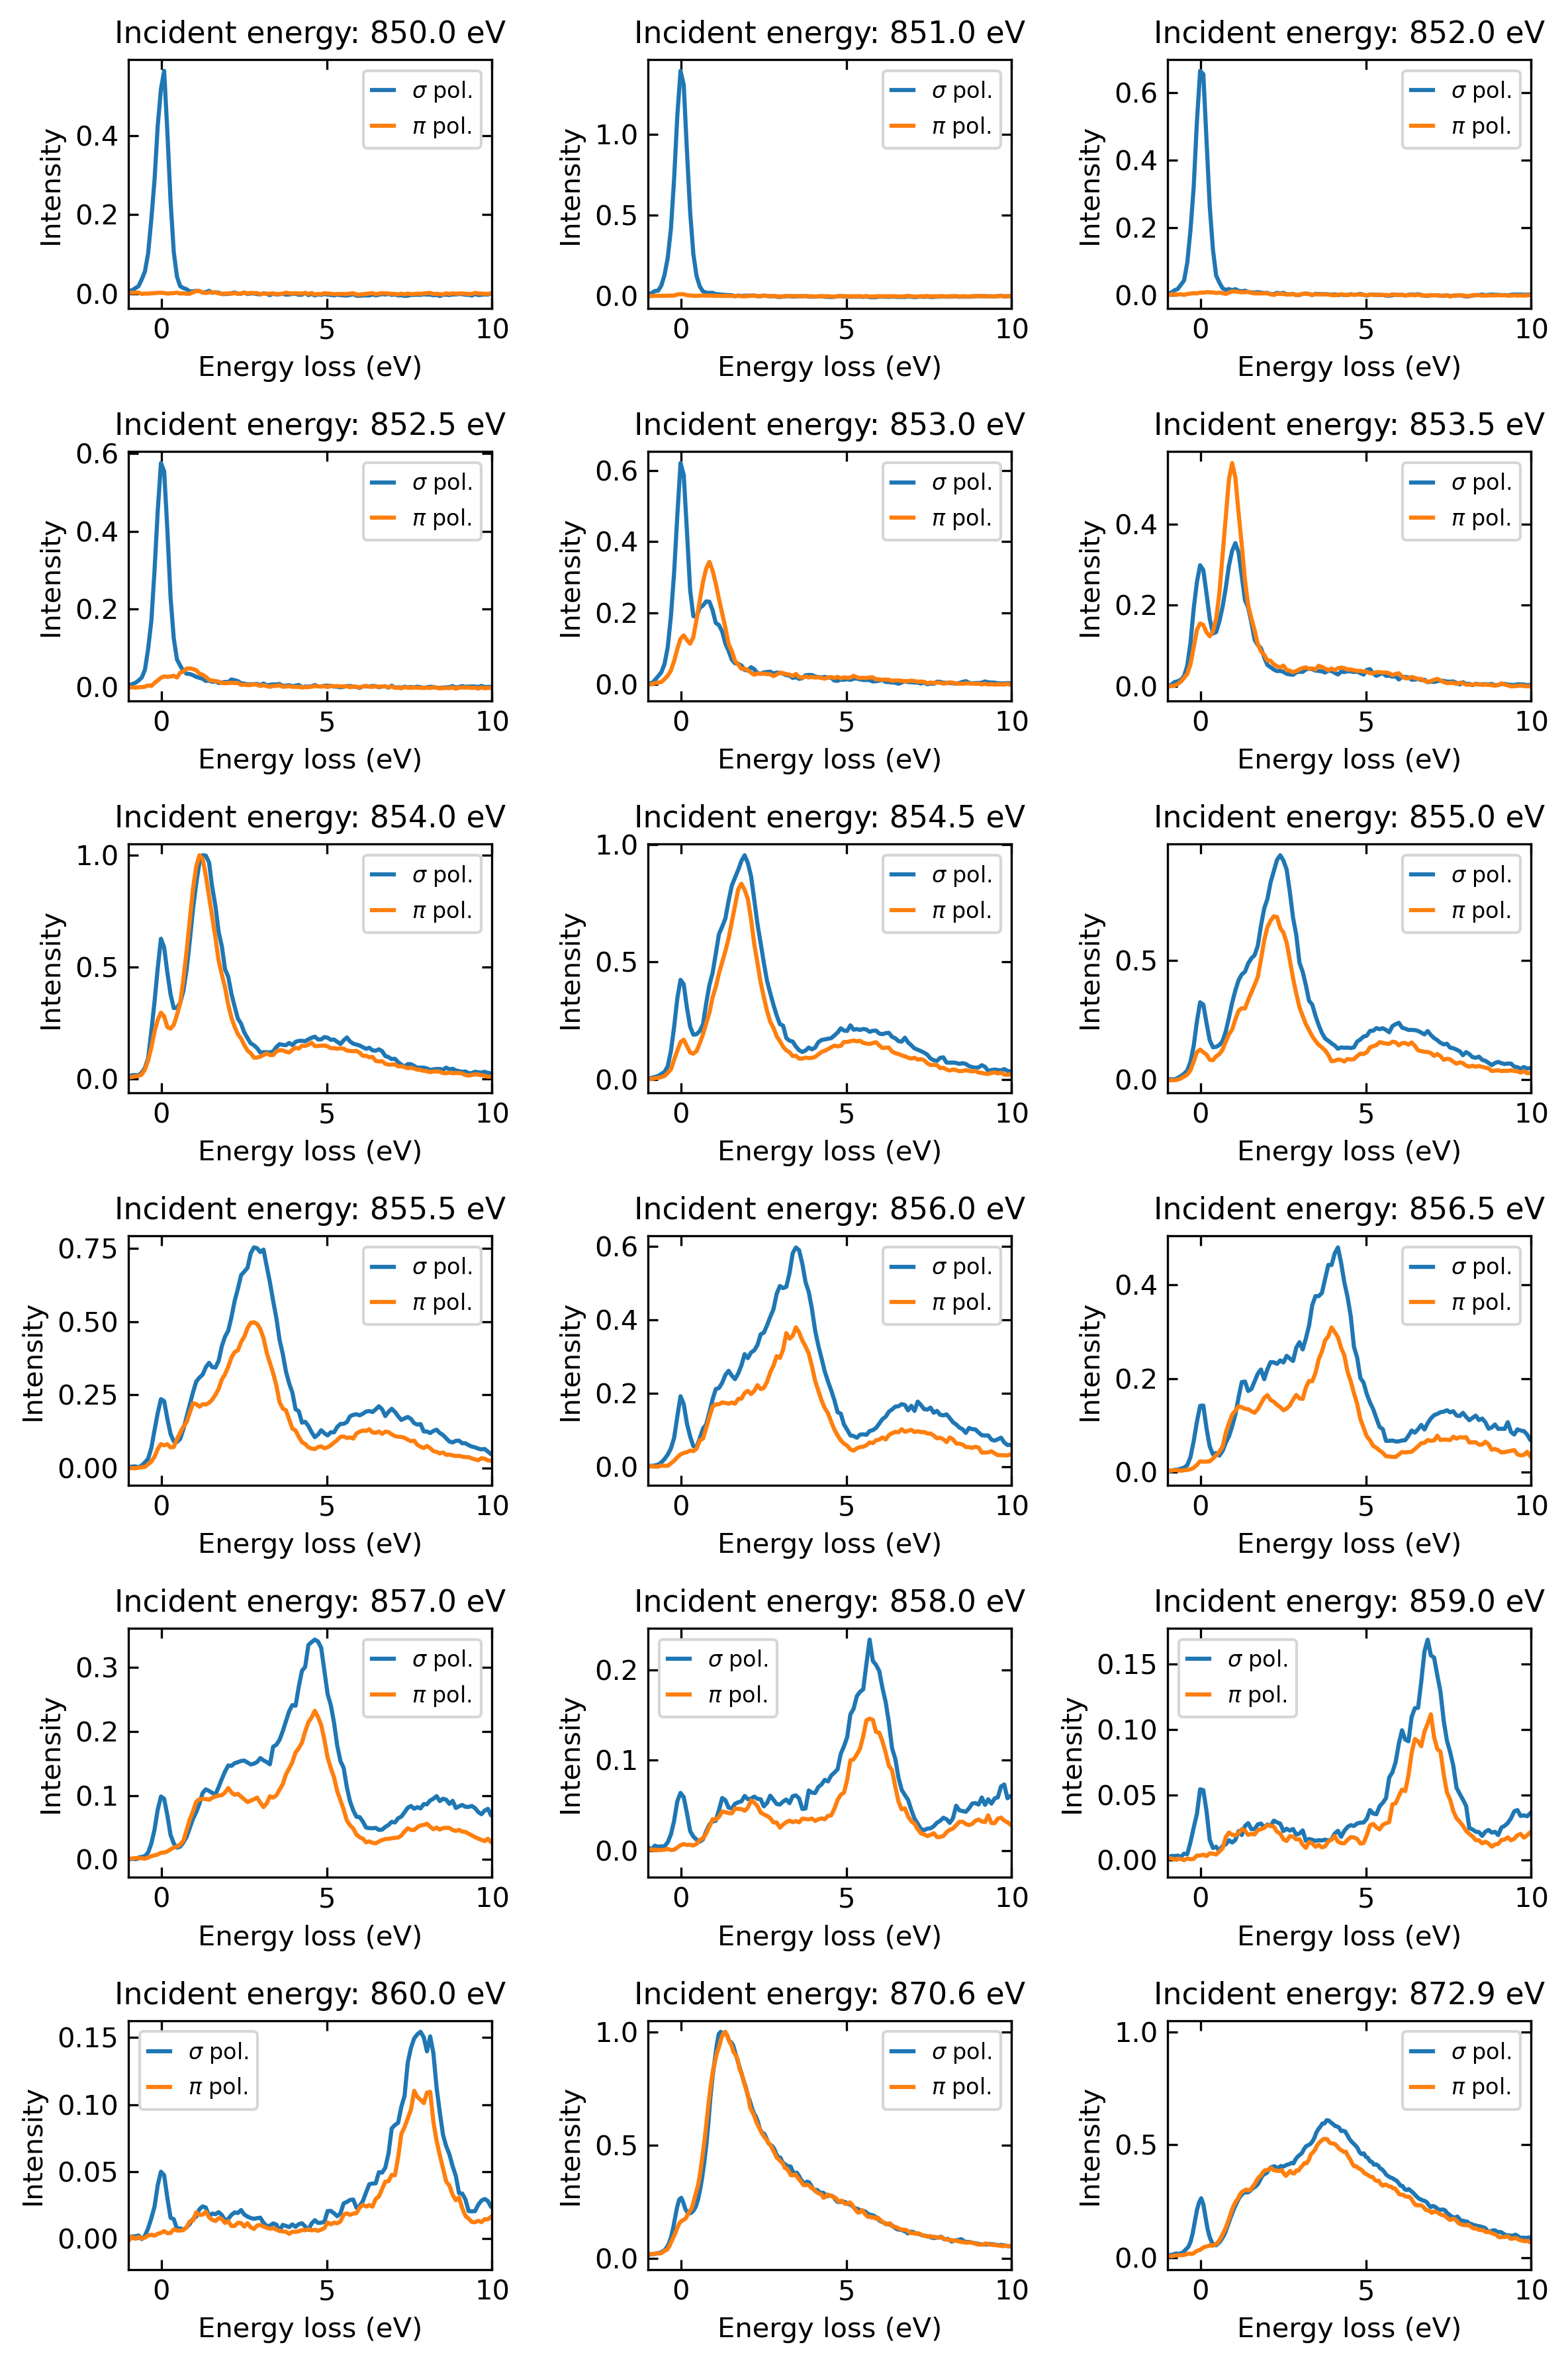

In [6]:
fig, axs = plt.subplots(6, 3, figsize=(8, 12), dpi=300)

energies = list(pi.keys())
energies.remove("map")
energies.remove(861.0)

for i, (ein, ax) in enumerate(zip(energies, axs.flatten())):
    plt.sca(ax)
    if ein < 865:
        plt.plot(sig[ein][:, 0], sig[ein][:, 1], label=r"$\sigma$ pol.")
        plt.plot(pi[ein][:, 0], pi[ein][:, 1], label=r"$\pi$ pol.")
    else:
        plt.plot(
            sig[ein][:, 0],
            sig[ein][:, 1]/sig[ein][:, 1].max(),
            label=r"$\sigma$ pol."
        )
        plt.plot(
            pi[ein][:, 0],
            pi[ein][:, 1]/pi[ein][:, 1].max(),
            label=r"$\pi$ pol."
        )
    
    plt.xlim(-1, 10)
    plt.ylabel("Intensity")
    plt.xlabel("Energy loss (eV)")
    plt.title(f"Incident energy: {ein} eV", fontsize=11)
    plt.tick_params(direction="in", top=True, right=True)
    plt.legend(fontsize=8, handlelength=1)

plt.tight_layout()